<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
    <h2>
    Predicción de la tarifa de pasajes aéreos
    
<a class="anchor" id="0"></a> 

Easemytrip es un sitio web para reservar pasajes aéreos y por lo tanto, una plataforma que clientes potenciales utilizan para comprar pasajes. A partir de datos descargados desde ahí, tenemos como objetivo analizar cómo se relaciona el precio de las tarifas aéreas con otras variables, predecir cuál será el precio del pasaje y responder a las siguientes consultas:

1) ¿Cómo varía el precio según la clase Economy y Business?
2) ¿Cómo varía el pasaje según cada aerolínea?
3) ¿En qué momento del día es más económico viajar?
4) ¿Qué relación hay entre la cantidad de escalas realizadas o la duración del vuelo y el precio del ticket?
5) ¿Cuándo es más conveniente sacar el pasaje?

Estas y varias preguntas más serán respondidas en el presente caso de estudio.

## **Tabla de Contenidos:**
> 1. [Importación de los datos](#1)
> 2. [Analisis Exploratorio de Datos](#2)
> 3. [Preprocesamiento de Datos](#3)
> 4. [Modelos de Machine Learning](#4)
> 5. [Conclusiones](#5)

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
    <h2>
    Importación de los datos
    
<a class="anchor" id="1"></a> 

In [1]:
# pip install xgboost

In [2]:
# Importamos las siguientes librerías:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

from sklearn.preprocessing import MinMaxScaler  # Para escalar las variables numéricas
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import train_test_split


# Importamos los modelos que vamos a usar:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn import metrics

In [3]:
df = pd.read_csv('C:/Users/fedel/Desktop/Python/Proyectos Propios/Predicción de pasajes aéreos/Clean_Dataset.csv', index_col=0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 11)

A partir de los datos descargados y depurados de la página web Easemytrip desde el 11/02/2022 hasta el 31/03/2022, obtuvimos 300.153 opciones diferentes de reserva de vuelos y contamos con la siguiente información:
    
- *Airline:* El nombre de la empresa áerea. Existen 6 compañías: "SpiceJet", "AirAsia", "Vistara", "GO_FIRST", "Indigo" y "Air_India".
- *Flight:* El código de vuelo del avión.
- *Source_city:* Ciudad de origen. Se analizaron 6 ciudades principales de la India: Delhi, Mumbai, Bangalore, Kolkata, Hyderabad y Chennai.
- *Departure_time:* A partir del horario de partida, se categorizaron 6 momentos diferentes del día.
- *Stops:* Escalas que realiza el avión entre la ciudad de origen y destino: ninguna, 1 y 2 o más. 
- *Arrival_time:* A partir del horario de llegada, se clasificaron 6 momentos distintos del día.
- *Destination_city:* La ciudad de destino: Delhi, Mumbai, Bangalore, Kolkata, Hyderabad y Chennai.
- *Class:* La clase de asiento del pasaje, puede ser "Business" o "Economy".
- *Duration:* Es una variable continua que muestra la cantidad total de horas para viajar entre las ciudades de origen y destino, es decir, la duración del vuelo.
- *Days_left:* Es la diferencia entre la fecha de salida y la fecha de reserva del pasaje.
- *Price:* El precio, es nuestra variable objetivo.

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
    <h2>
    Análisis Exploratorio de Datos
    
<a class="anchor" id="2"></a> 

In [5]:
df.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [7]:
print( f"Cantidad de filas duplicadas: {df.duplicated().sum()}")

Cantidad de filas duplicadas: 0


Contamos con 8 variables categóricas que deberán ser convertidas a numéricas para poder utilizar modelos de machine learning. El dataset no contiene valores faltantes ni filas duplicadas.

## Características del mercado

In [8]:
df1=df.groupby(['flight','airline'],as_index=False).count()

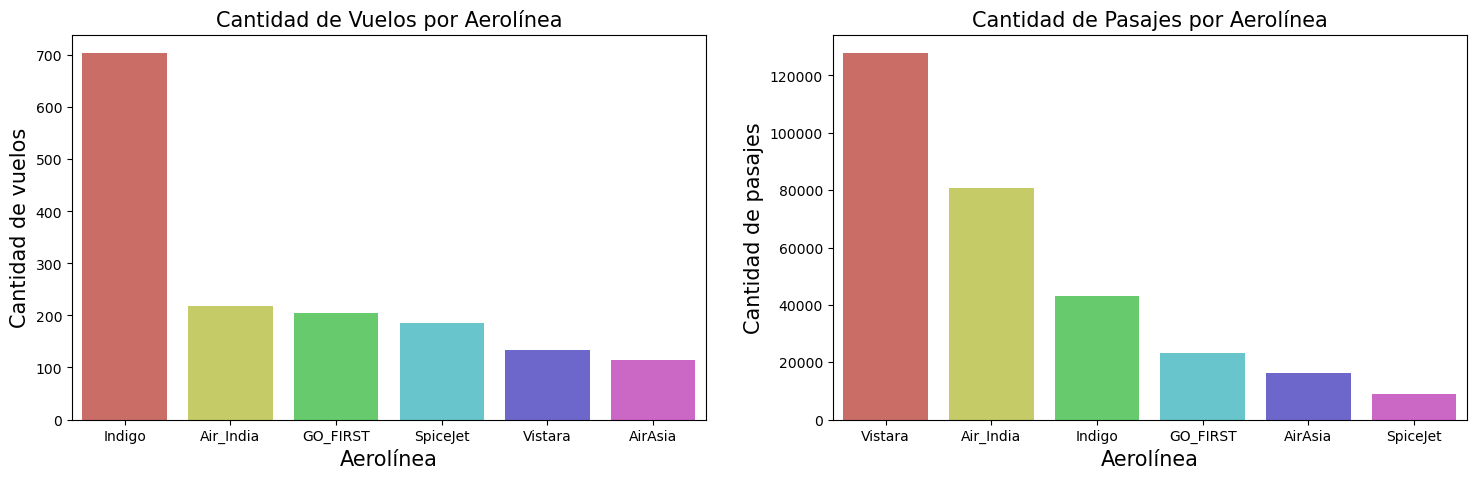

In [9]:
plt.figure(figsize = (18,5))

plt.subplot(1,2,1)
sns.countplot(x='airline', data=df1,palette='hls', order=df1.airline.value_counts().index)
plt.title('Cantidad de Vuelos por Aerolínea',fontsize=15)
plt.xlabel('Aerolínea',fontsize=15)
plt.ylabel('Cantidad de vuelos',fontsize=15)

plt.subplot(1,2,2)
sns.countplot(x='airline', data=df,palette='hls', order=df.airline.value_counts().index)
plt.title('Cantidad de Pasajes por Aerolínea',fontsize=15)
plt.xlabel('Aerolínea',fontsize=15)
plt.ylabel('Cantidad de pasajes',fontsize=15)

plt.show()

Indigo realizó más vuelos que el resto de las aerolineas.
Vistara y Air_India fueron las empresas que más pasajes vendieron.
Sin embargo, Vistara fue la segunda empresa que menos viajes realizó en el período analizado.
Esto nos puede dar un indicio de que la capacidad de pasajeros en cada vuelo de Vistara es mayor que para el resto de las compañías.

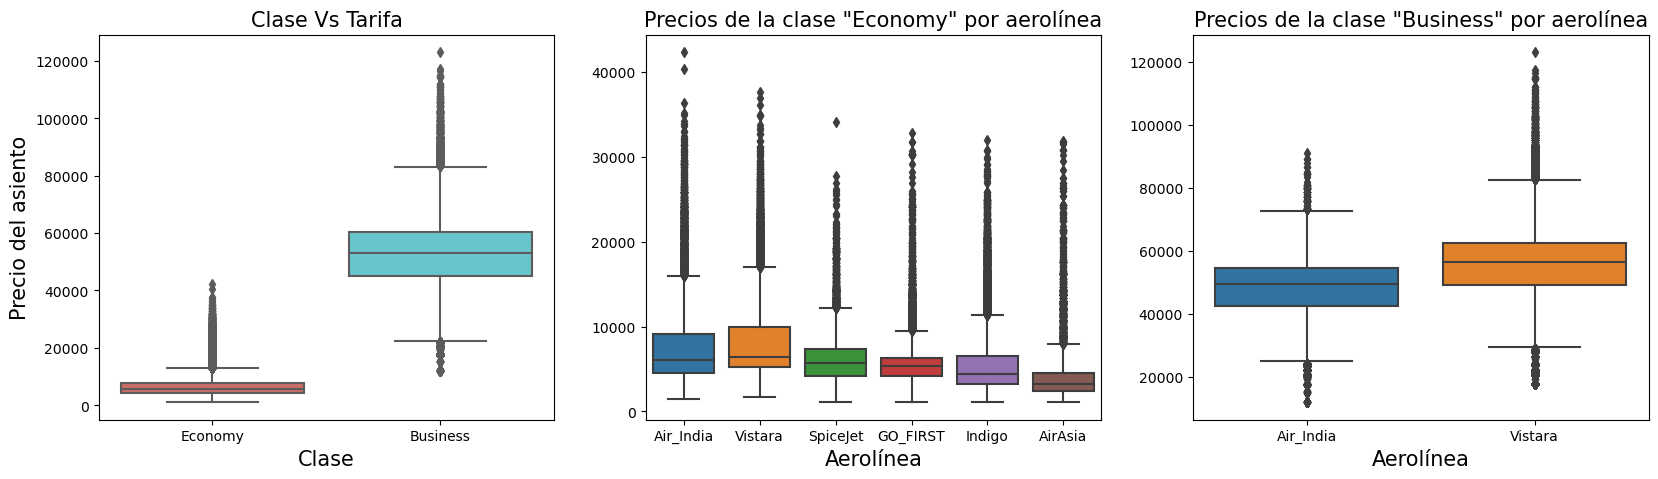

In [10]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Clase Vs Tarifa',fontsize=15)
plt.xlabel('Clase',fontsize=15)
plt.ylabel('Precio del asiento',fontsize=15)

plt.subplot(1,3,2)
sns.boxplot(data=df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), x='airline', y='price')
plt.title('Precios de la clase "Economy" por aerolínea', fontsize=15)
plt.xlabel('Aerolínea', fontsize=15)
plt.ylabel('', fontsize=15)

plt.subplot(1,3,3)
sns.boxplot(data=df.loc[df["class"]=='Business'].sort_values("price", ascending = True), x='airline', y='price')
plt.title('Precios de la clase "Business" por aerolínea', fontsize=15)
plt.xlabel('Aerolínea', fontsize=15)
plt.ylabel('', fontsize=15)

plt.show()

La brecha entre el precio de asientos "Business" y "Economy" es grande. Si bien existen tarifas "Economy" atípicas iguales o más caras que la clase "Business", la mediana de la clase Business es aproximadamente 5 veces superior que la clase Economy.
Las únicas dos empresas que ofrecen asientos "Business" son Vistara y Air_India. Vistara tiene precios más caros que Air_India para la clase Business y similares para la clase "Economy". Air_India y Vistara brindan servicios "Economy" a un precio más elevado que el resto de las compañias. AirAsia es la aerolínea más económica.

<function matplotlib.pyplot.show(close=None, block=None)>

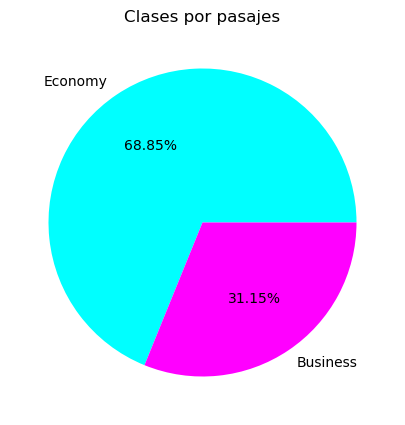

In [11]:
plt.figure(figsize = (18,5))
df['class'].value_counts().plot(kind='pie', textprops={'color':'black'}, autopct='%.2f%%', cmap='cool')
plt.title('Clases por pasajes')
plt.ylabel('')
plt.show

El 69% de los pasajeros viaja en clase Economy. 

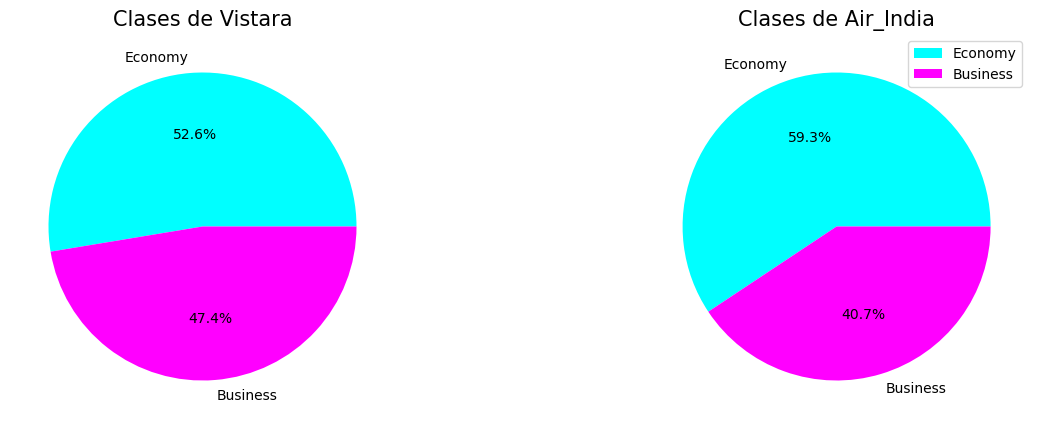

In [12]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
df.loc[df["airline"]=='Vistara']['class'].value_counts().plot(kind='pie', textprops={'color':'black'}, autopct='%.1f%%', cmap='cool')
plt.title('Clases de Vistara', fontsize = 15)
plt.ylabel('')

plt.subplot(1,2,2)
df.loc[df["airline"]=='Air_India']['class'].value_counts().plot(kind='pie', textprops={'color':'black'}, autopct='%.1f%%', cmap='cool')
plt.title('Clases de Air_India', fontsize = 15)
plt.ylabel('')

plt.legend(['Economy','Business'])

El 47% de los clientes de Vistara son Business y el 41% de los pasajeros de Air_India son Business.

Veamos el precio y la duración promedio para la clase Economy de un destino a otro:

Text(0.5, 0.98, 'Precios de las aerolíneas para la clase Economy basado en la ciudad de origen y destino')

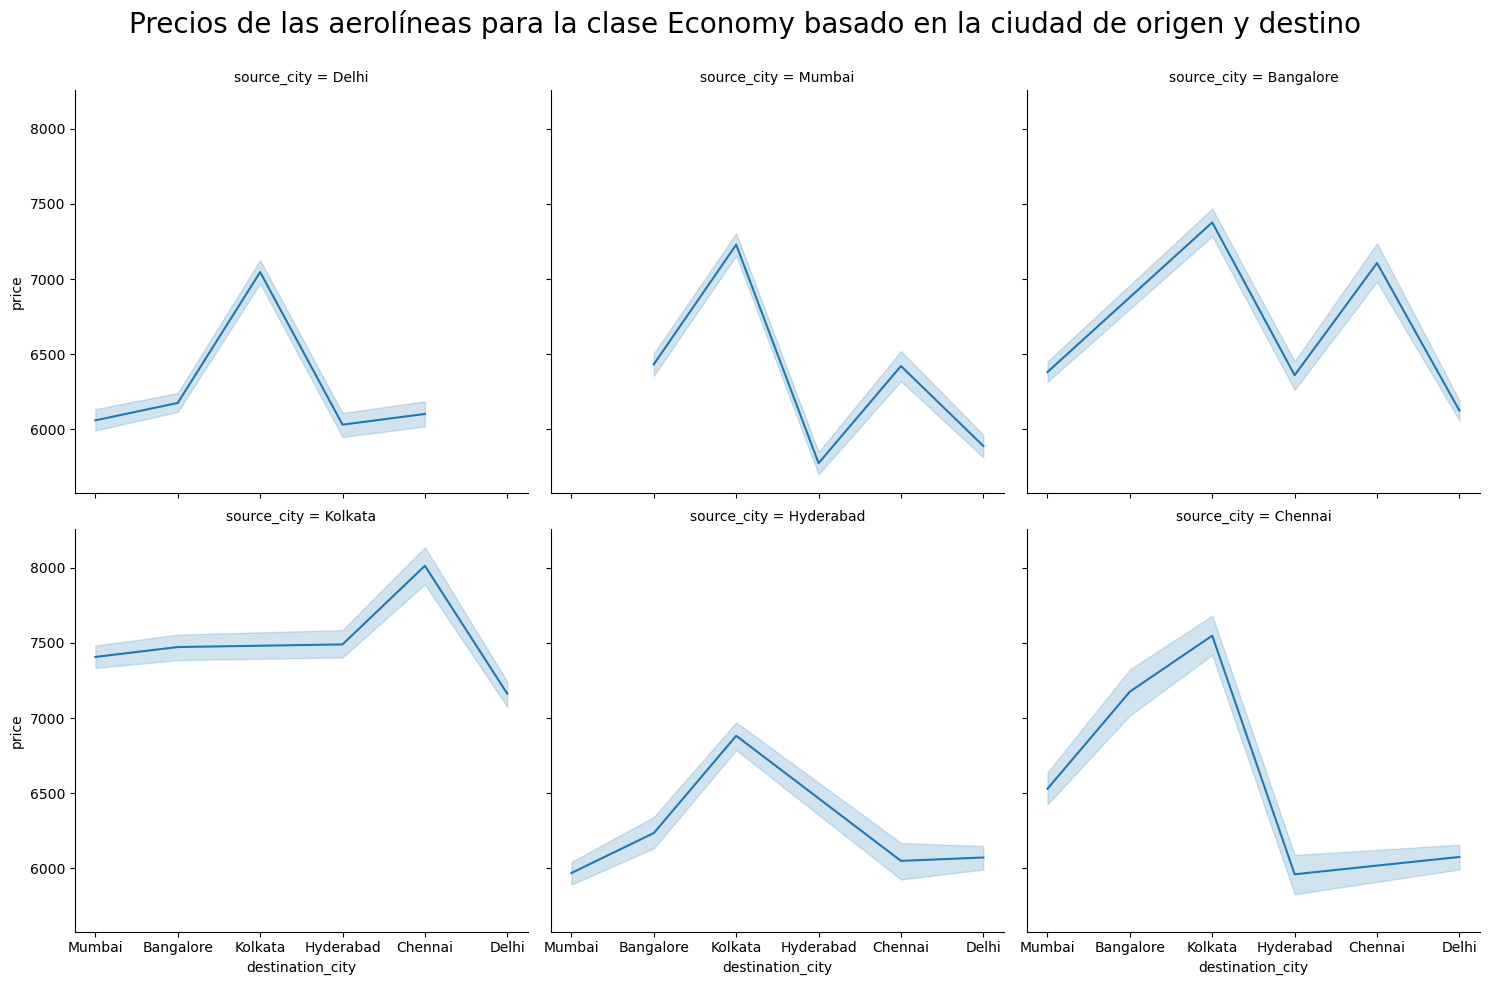

In [13]:
df4 = df.loc[df["class"]=='Economy']
ax = sns.relplot(col="source_city", y="price", kind="line",x='destination_city', data=df4, col_wrap=3)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Precios de las aerolíneas para la clase Economy basado en la ciudad de origen y destino',fontsize=20)

In [14]:
df5 = df4.groupby(['source_city','destination_city'],as_index=False)['price'].mean()
df5 = round(df5,2)

In [15]:
matrix = df5.pivot(index='source_city', columns='destination_city', values = 'price')
matrix.fillna('-', inplace=True)
print("Precio promedio para la clase Economy de un destino a otro:")
matrix

Precio promedio para la clase Economy de un destino a otro:


destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
source_city,,,,,,
Bangalore,-,7105.95,6124.9,6360.14,7375.64,6381.09
Chennai,7175.02,-,6075.96,5960.79,7547.3,6529.12
Delhi,6175.62,6102.32,-,6031.16,7045.62,6059.83
Hyderabad,6234.88,6049.88,6072.3,-,6881.68,5969.26
Kolkata,7471.62,8011.75,7161.4,7489.14,-,7405.79
Mumbai,6432.51,6420.92,5889.28,5774.89,7227.97,-


In [16]:
df6 = df4.groupby(['source_city','destination_city'],as_index=False)['duration'].mean()
df6 = round(df6,2)

In [17]:
matrix = df6.pivot(index='source_city', columns='destination_city', values = 'duration')
matrix.fillna('-', inplace=True)
print("Duración promedio para la clase Economy de un destino a otro:")
matrix

Duración promedio para la clase Economy de un destino a otro:


destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
source_city,,,,,,
Bangalore,-,13.86,9.38,13.12,11.66,10.28
Chennai,13.28,-,11.23,11.75,13.36,12.07
Delhi,9.96,11.88,-,12.08,12.0,9.54
Hyderabad,10.73,11.77,10.45,-,12.37,11.93
Kolkata,12.63,13.88,10.96,12.77,-,12.93
Mumbai,11.25,12.07,8.97,13.15,12.32,-


En general, cuanto más dura el vuelo, más caro es el pasaje.

Los vuelos con origen en Kolkata suelen ser más caros que el resto de las ciudades.

<function matplotlib.pyplot.show(close=None, block=None)>

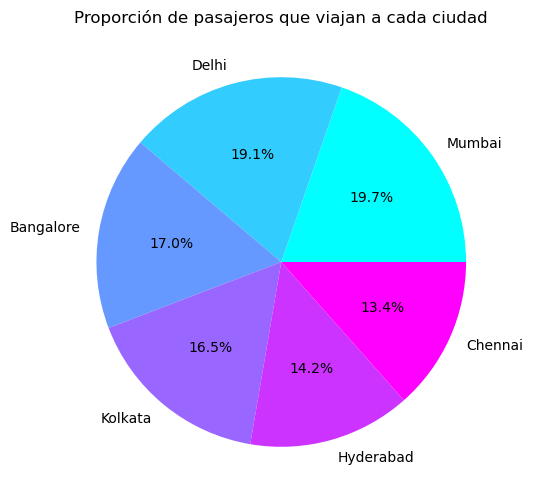

In [18]:
plt.figure(figsize = (10,6))
df['destination_city'].value_counts().plot(kind='pie', textprops={'color':'black'}, autopct='%.1f%%', cmap='cool')
plt.title('Proporción de pasajeros que viajan a cada ciudad')
plt.ylabel('')
plt.show

Los destinos más populares son Delhi y Mumbai, y el menos concurrido por los pasajeros es Chennai.

## ¿Cómo varía el precio con la duración del vuelo?

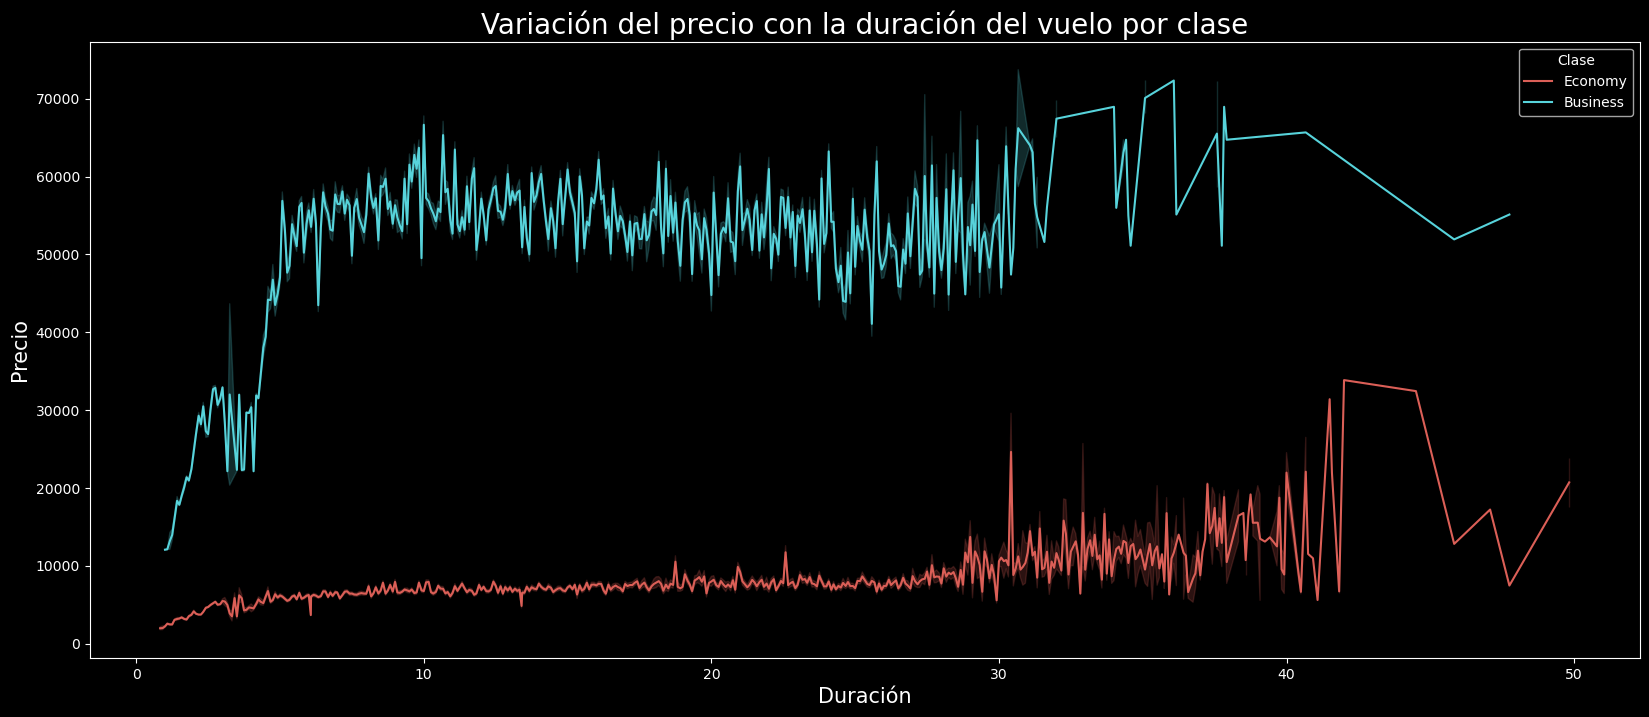

In [19]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Variación del precio con la duración del vuelo por clase',fontsize=20)
plt.xlabel('Duración',fontsize=15)
plt.ylabel('Precio',fontsize=15)
plt.legend(title = 'Clase')
plt.show()

A mayor duración del vuelo, el precio se incrementa para ambas clases.

## ¿Cómo varía el precio según las escalas realizadas entre la ciudad de origen y destino?

Text(0.5, 0, 'Aerolínea')

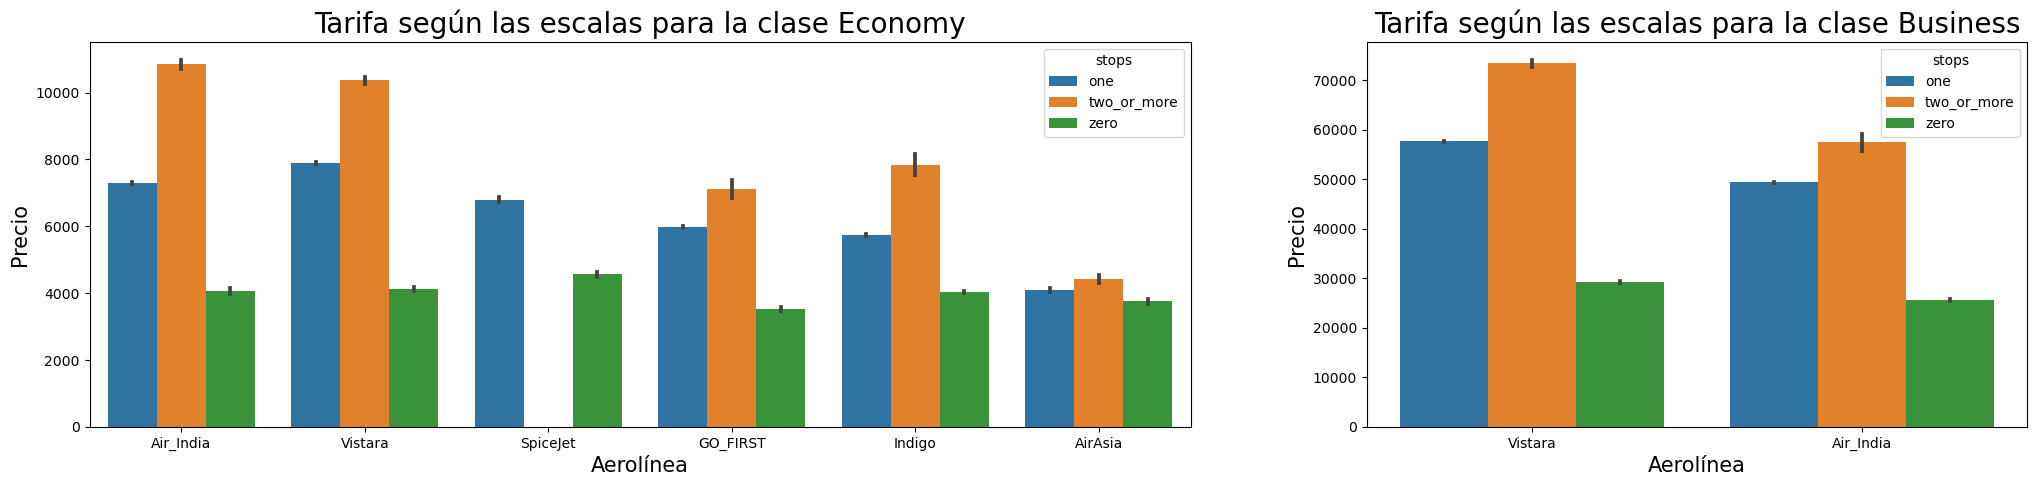

In [20]:
plt.style.use('default')
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Tarifa según las escalas para la clase Economy",fontsize=20)
axs[0].set_ylabel('Precio', fontsize=15)
axs[0].set_xlabel('Aerolínea', fontsize=15)

sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Tarifa según las escalas para la clase Business",fontsize=20)
axs[1].set_ylabel('Precio', fontsize=15)
axs[1].set_xlabel('Aerolínea', fontsize=15)

Podemos ver que a mayor cantidad de "paradas", mayor es el precio de cada pasaje y mayor es la diferencia de precios entre una compañia y otra. Los diferentes análisis realizados tienden a mostrar que AirAsia se trata de una empresa low cost.

## ¿En qué momento conviene sacar el pasaje?

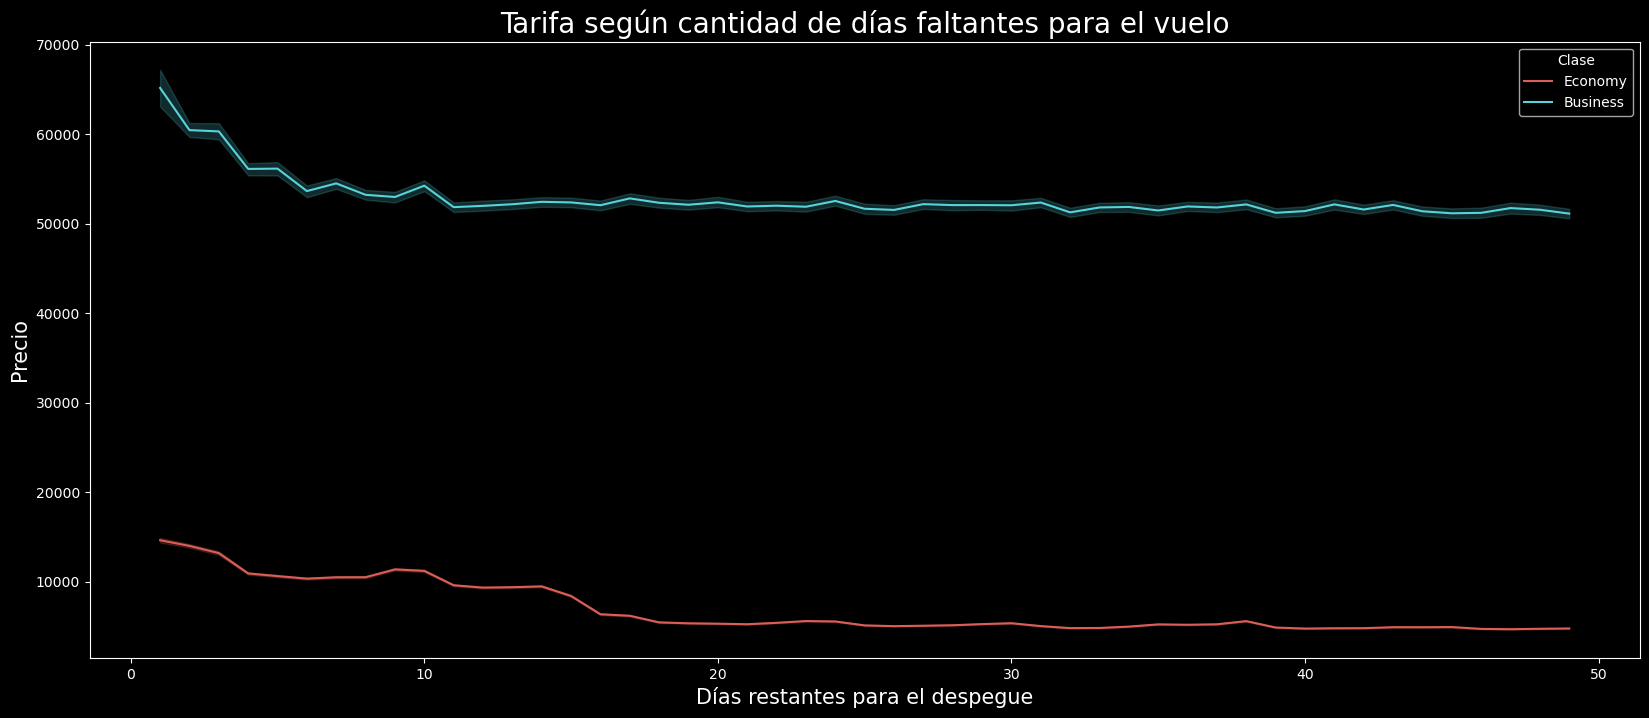

In [21]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',hue='class',palette='hls')
plt.title('Tarifa según cantidad de días faltantes para el vuelo',fontsize=20)
plt.xlabel('Días restantes para el despegue',fontsize=15)
plt.ylabel('Precio',fontsize=15)
plt.legend(title = "Clase")
plt.show()

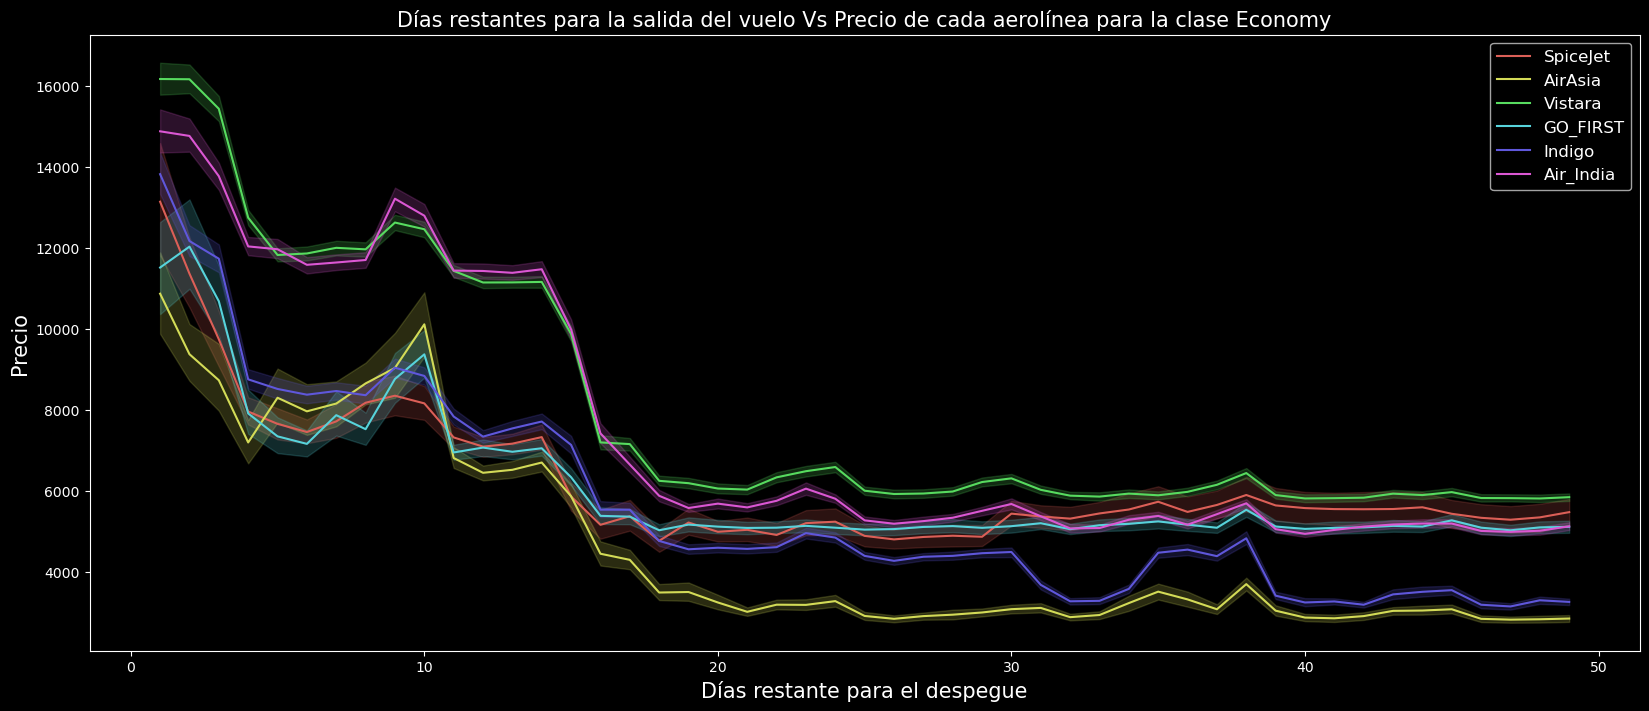

In [22]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df.loc[df["class"]=='Economy'],x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Días restantes para la salida del vuelo Vs Precio de cada aerolínea para la clase Economy',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Días restante para el despegue',fontsize=15)
plt.ylabel('Precio',fontsize=15)
plt.show()

Se puede ver un patrón en la forma en que evolucionan los precios según la cantidad de días restantes. Para la clase Economy, cuando quedan más de 20 días el precio es más estable. Cuando faltan menos de 20 días, los precios se incrementan drásticamente, llegando a su tope cuando faltan 2 días para el despegue.

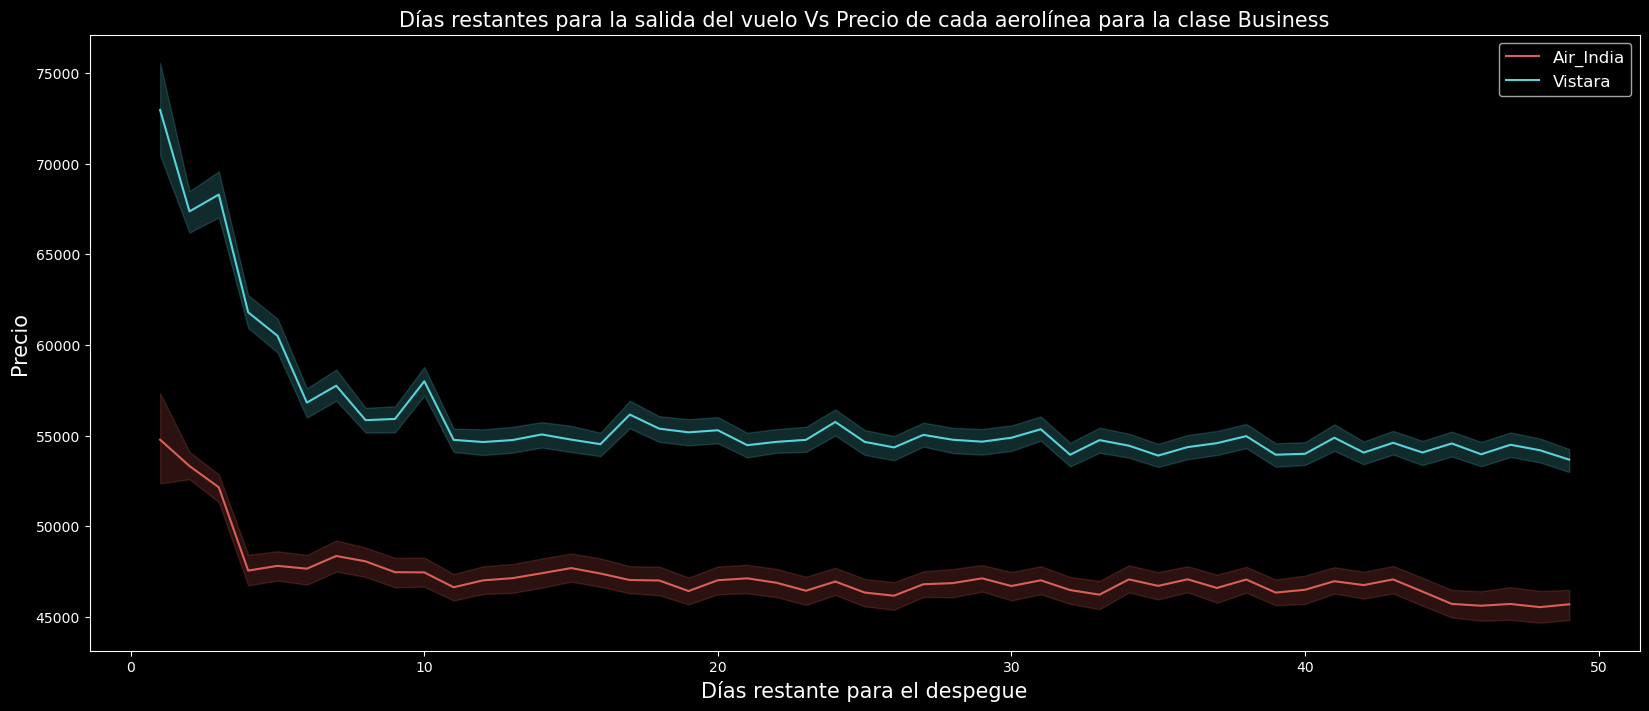

In [23]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df.loc[df["class"]=='Business'],x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Días restantes para la salida del vuelo Vs Precio de cada aerolínea para la clase Business',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Días restante para el despegue',fontsize=15)
plt.ylabel('Precio',fontsize=15)
plt.show()

Para la clase Business también existe un patrón similar, que se da a partir de los 10 días. Como mencionamos antes, podemos ver que los precios de Vistara son más elevados que los de Air_India en la clase Business y similares en la clase Economy.

Text(0, 0.5, '')

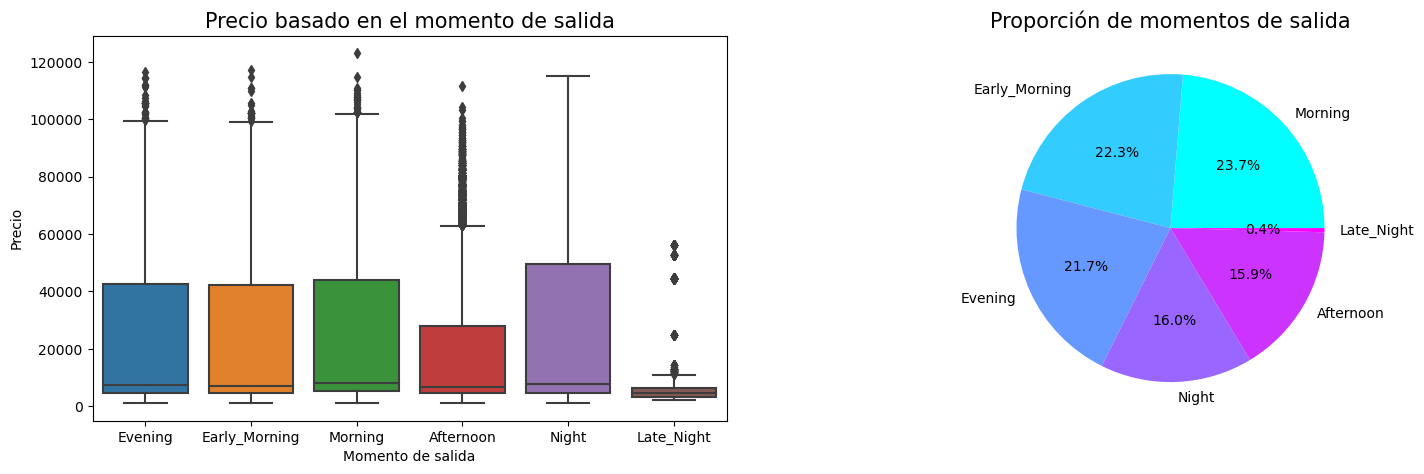

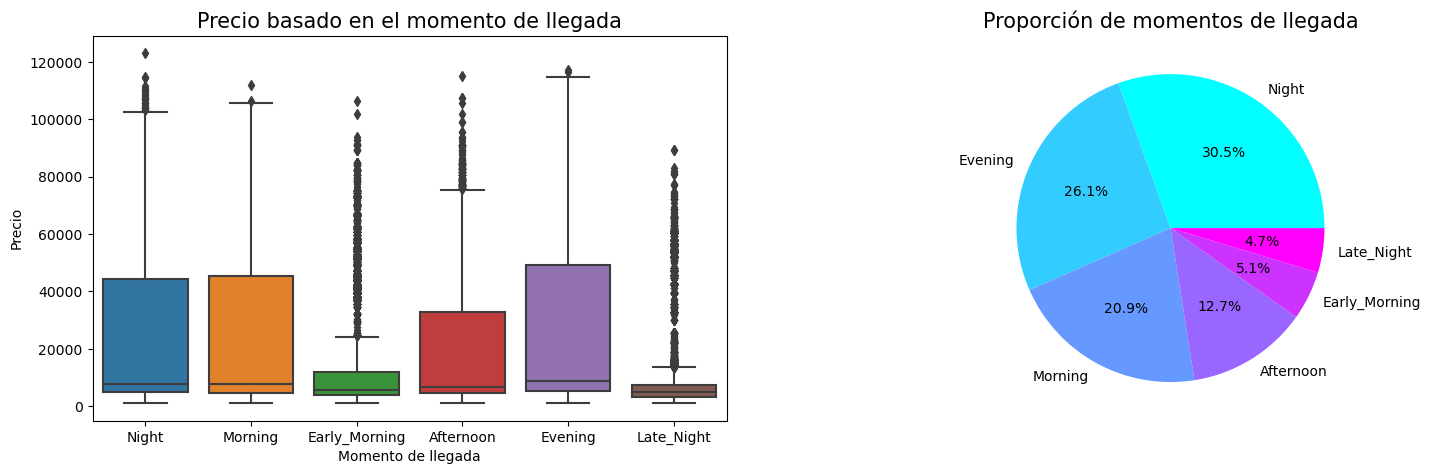

In [24]:
plt.style.use('default')


plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="price", x="departure_time",showfliers=True).set_title("Precio basado en el momento de salida",fontsize=15)
plt.ylabel('Precio')
plt.xlabel('Momento de salida')

plt.subplot(1,2,2)
df['departure_time'].value_counts().plot(kind='pie', textprops={'color':'black'}, autopct='%.1f%%', cmap='cool')
plt.title('Proporción de momentos de salida', fontsize = 15)
plt.ylabel('')


plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="price", x="arrival_time",showfliers=True).set_title("Precio basado en el momento de llegada",fontsize=15)
plt.ylabel('Precio')
plt.xlabel('Momento de llegada')

plt.subplot(1,2,2)
df['arrival_time'].value_counts().plot(kind='pie', textprops={'color':'black'}, autopct='%.1f%%', cmap='cool')
plt.title('Proporción de momentos de llegada', fontsize = 15)
plt.ylabel('')

La mayoría de los pasajeros eligen salir a la mañana o llegar a la noche a destino. Sin embargo, salir a la tarde o tarde por la noche suele ser más económico, que es cuando tiende a haber menos personas. El precio del pasaje es similar para vuelos con horario de salida temprano en la mañana, mañana o tarde. Salir por la noche puede ser más caro en general. 
   
En cuanto al momento de llegada, lo más conveniente es llegar temprano por la mañana o tarde por la noche ya que suele ser más económico. Es cuando suele haber menos gente. Llegar a la noche o por la mañana cuesta casi lo mismo, pero llegar por la tarde podría ser más costoso.

Hacemos una copia de los datos:

In [26]:
df_bk=df.copy()

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
    <h2>
    Preprocesamiento de Datos
    
<a class="anchor" id="3"></a> 

## Transformación de Variables Categóricas

Identificamos las variables de tipo "object" y las numéricas:

In [27]:
cat_cols = list(df.select_dtypes(include=['object']).columns)
print(f"Cantidad de columnas categóricas: {len(cat_cols)}")
print(f"Columnas categóricas:\n{cat_cols}")

Cantidad de columnas categóricas: 8
Columnas categóricas:
['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [28]:
var_numericas = list(df.drop(columns=['price']).select_dtypes(exclude=['object']).columns)
print(f"Cantidad de columnas numéricas: {len(var_numericas)}")
print(f"Columnas numéricas:\n{var_numericas}")

Cantidad de columnas numéricas: 2
Columnas numéricas:
['duration', 'days_left']


Eliminamos la columna "Flight" que contiene 1.561 valores únicos:

In [29]:
df = df.drop("flight", axis = 1)

Necesitamos transformar las variables categóricas a numéricas. 

In [30]:
df['stops'] = df['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2}).astype(int)

In [31]:
df['class'] = df['class'].replace({'Economy': 0, 'Business': 1}).astype(int)

Generamos dummies para el resto de las variables categóricas con la técnica de get_dummies:

In [32]:
variables_dummies = ["airline","source_city","destination_city","departure_time","arrival_time"]

dummies = pd.get_dummies(df[variables_dummies], drop_first= True)

data_encoded = pd.concat([df,dummies],axis=1)

data_encoded = data_encoded.drop(variables_dummies,axis=1)

data_encoded.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2.17,1,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,5956,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


## Transformación de Variables Numéricas

El escalamiento de datos es un paso de preprocesamiento en machine learning que apunta a estandarizar el rango o la escala de las variables de entrada. El objetivo del escalado es garantizar que cada característica tenga una escala o rango similar, lo que puede facilitar que algunos modelos de machine learning converjan más rápido y mejoren su rendimiento.

La elección del método de escalamiento depende de la distribución y el rango de las variables de entrada, así como del modelo de machine learning específico que se utiliza. En general, es una buena práctica escalar los datos antes de entrenar un modelo de aprendizaje automático, a menos que se sepa que el modelo es insensible a la escala de las variables de entrada.

Existen muchas técnicas para realizar el proceso de escalamiento de los datos, las más utilizadas son:
- Logarítmica
- StandardScaler
- Min Max Scaler
- Quantile Transformer
- Robust Scaling
- Absolute Maximum Scaling

Para el presente caso de estudio utilizaremos MinMaxScaler, que escala los datos a un rango fijo de valores entre 0 y 1. Funciona restando el valor mínimo de cada característica y luego dividiendo por el rango (es decir, la diferencia entre los valores máximo y mínimo). La ventaja de este método es que conserva la forma de la distribución original y no cambia la posición relativa de los puntos de datos. También es relativamente fácil de usar y comprender. Sin embargo, es posible que MinMaxScaler no funcione bien si la distribución de los datos está muy sesgada o tiene valores atípicos, ya que puede magnificar los efectos de estos valores atípicos. En otras palabras, este scaler responde bien si la desviación estándar es pequeña y cuando una distribución es no Gausiana. Este scaler es sensible a outliers.

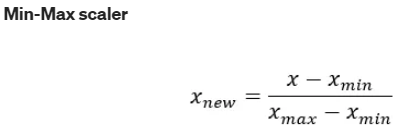

In [33]:
import IPython.display as display
from PIL import Image

display.display(Image.open("C:/Users/fedel/Downloads/Min-Max scaler.png"))

<center><a><img src="https://miro.medium.com/v2/resize:fit:786/format:webp/0*3huooBXTLQs_qpws.png" border="3" width=800 height=500 class="center"></a>

In [34]:
# Definimos el scaler:
scaler = MinMaxScaler((0,1))
# Transformamos los datos:
scaled = scaler.fit_transform(data_encoded[var_numericas])
print(scaled[0:5,:])

[[0.02734694 0.        ]
 [0.03061224 0.        ]
 [0.02734694 0.        ]
 [0.02897959 0.        ]
 [0.03061224 0.        ]]


In [35]:
# Unimos los datos escalados con los datos encodeados.

data_scaled = pd.concat([pd.DataFrame(scaled, columns=var_numericas), data_encoded[[x for x in data_encoded.columns if x not in var_numericas ]]], axis=1)
data_scaled.head()

,duration,days_left,stops,class,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0.027347,0.0,0,0,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,0.030612,0.0,0,0,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,0.027347,0.0,0,0,5956,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
3,0.028980,0.0,0,0,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0.030612,0.0,0,0,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [36]:
# Elegimos 'price' como la variable objetivo
y = data_scaled['price']

# Extraemos las variables de entrada
x = data_scaled.drop(['price'], axis=1)

## ¿Qué variables influyen más en el precio?

- Para visualizar la correlación lineal de cada variable con el precio, trazaré una matriz de correlación:

<Axes: >

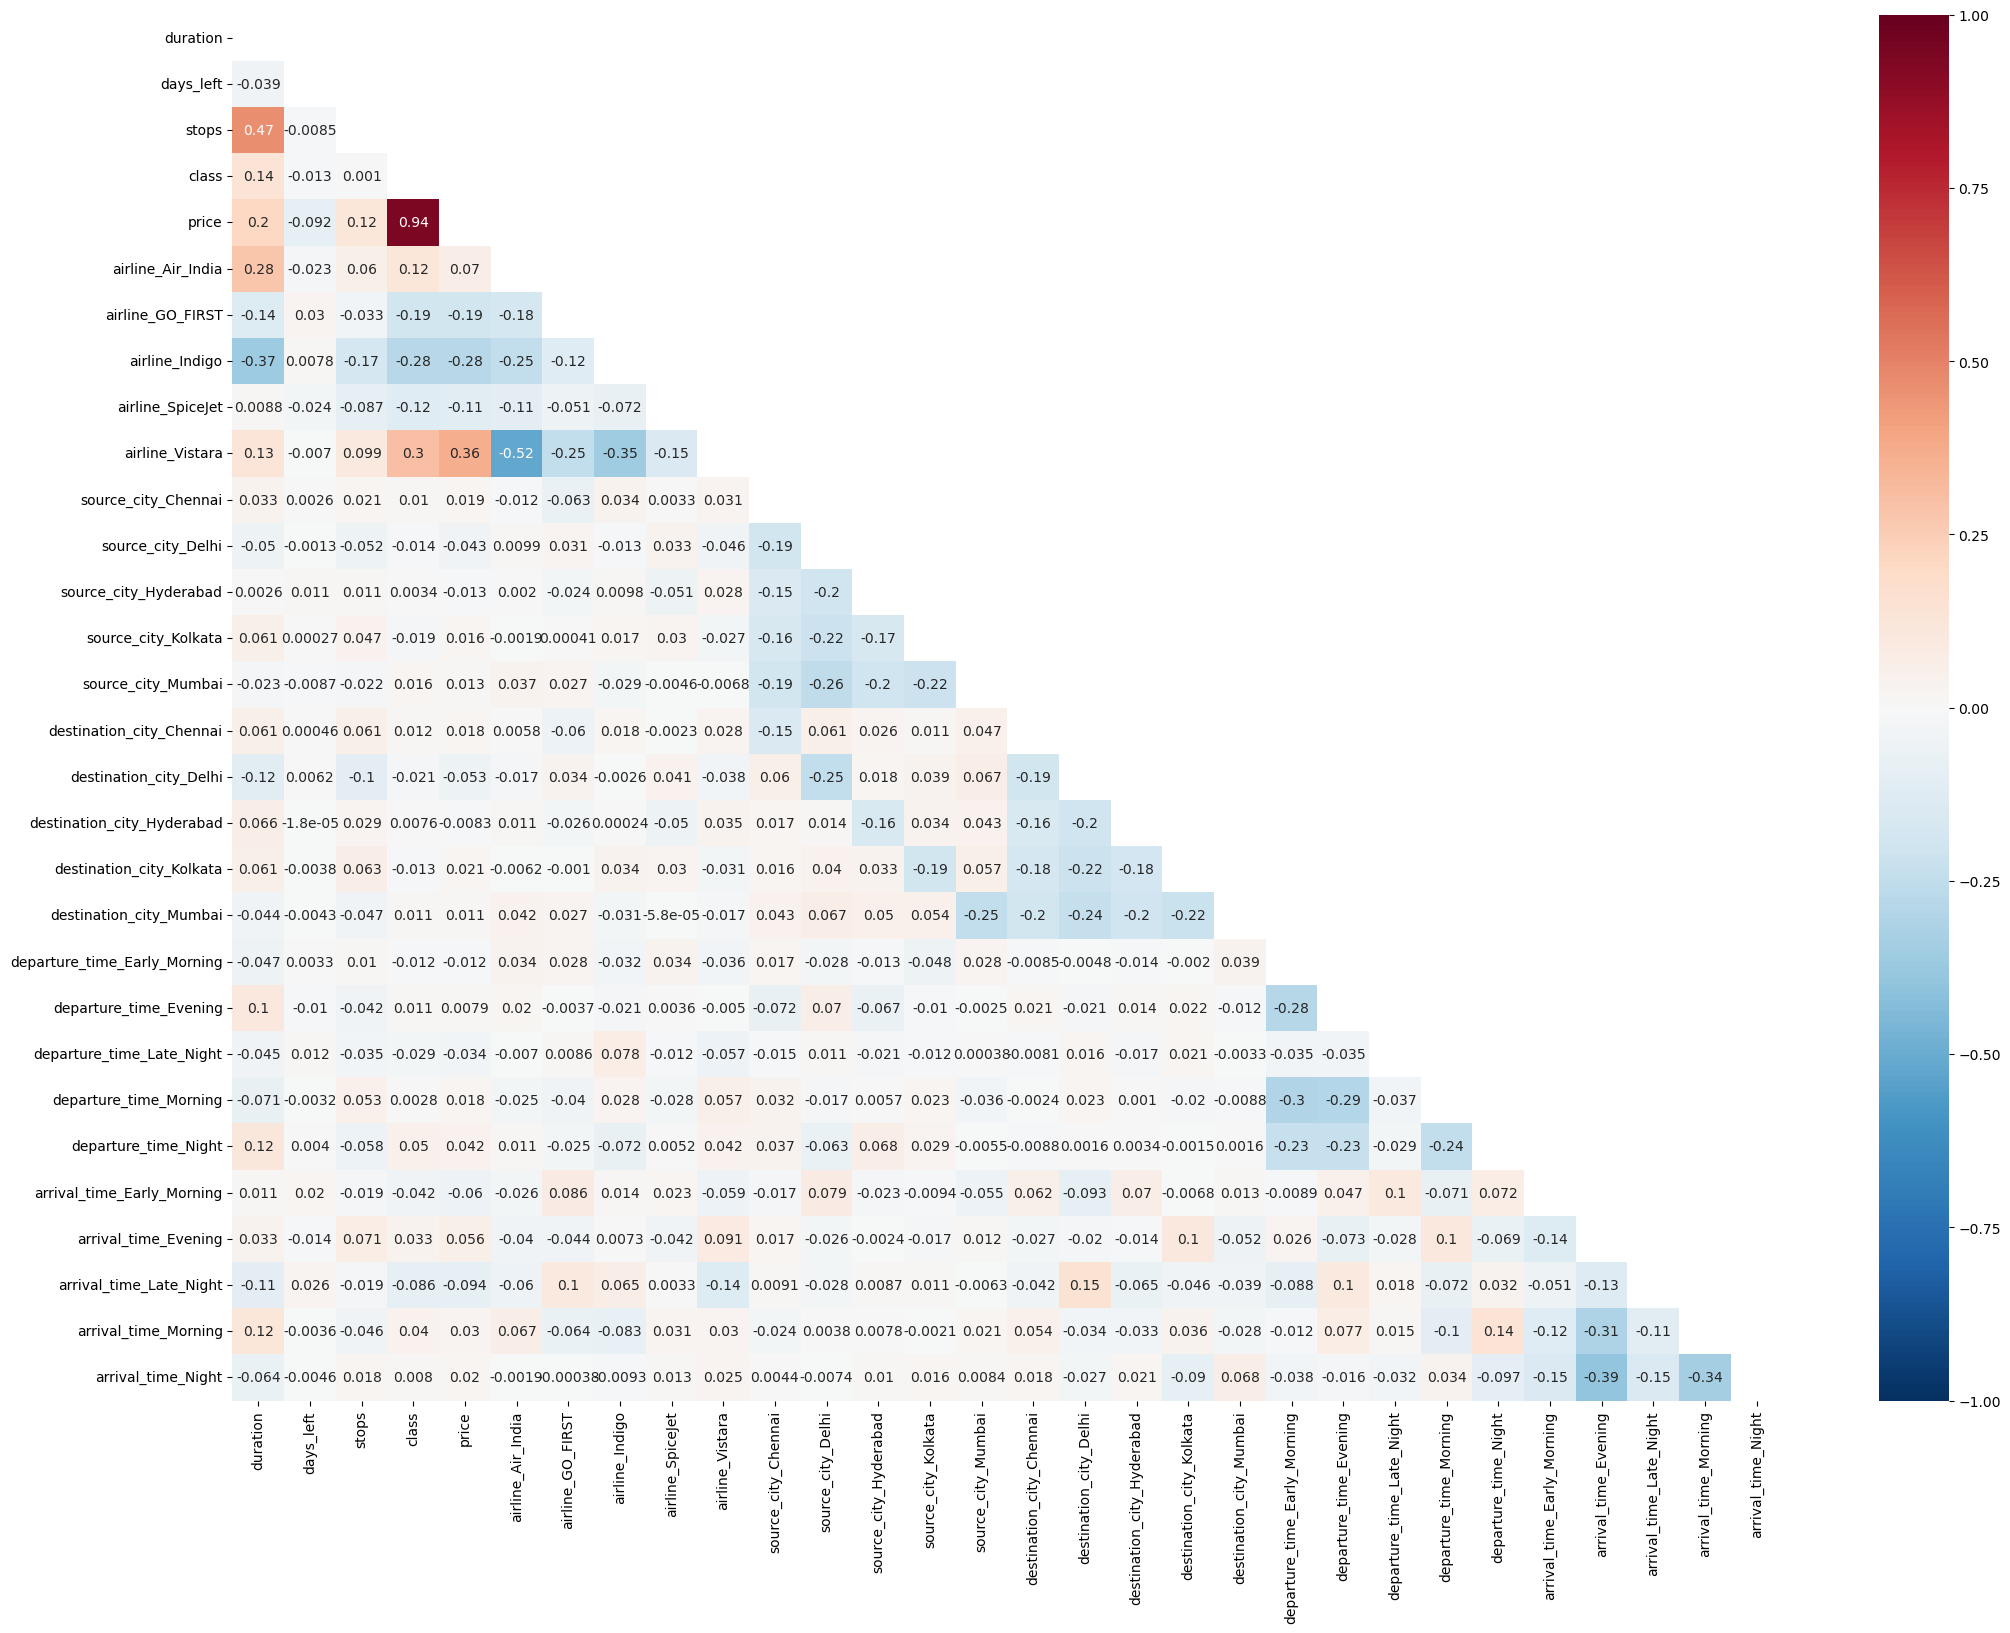

In [37]:
mask = np.triu(np.ones_like(data_scaled.corr(), dtype=bool))

plt.figure(figsize = (25,18))

cor = data_scaled.corr()
sns.heatmap(cor, mask=mask, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')

In [38]:
cor_target = abs(cor["price"])

relevant_features = cor_target
relevant_features.sort_values(ascending = False).head(10)

price                      1.000000
class                      0.937860
airline_Vistara            0.360816
airline_Indigo             0.280882
duration                   0.204222
airline_GO_FIRST           0.194179
stops                      0.119648
airline_SpiceJet           0.114019
arrival_time_Late_Night    0.093602
days_left                  0.091949
Name: price, dtype: float64

De acuerdo con la correlación de Pearson, las features más relevantes son: **la clase de asiento, la aerolínea, la duración del vuelo y la cantidad de escalas realizadas**. En especial, existe una fuerte correlación lineal entre la clase de asiento y el precio.

- Veamos con el método "KBest Features" si existen otras variables importantes que tengan o no correlación lineal con el precio.

KBest Features es una técnica en feature engineering que apunta a seleccionar las "k" características más importantes de una base de datos basado en algunas métricas de estadística. La idea detrás de esta técnica es reducir la dimensionalidad del dataset al seleccionar solo las variables más informativas, que puedan mejorar el rendimiento de algunos modelos de machine learning y reducir overfitting.

KBest Feature selection funciona haciendo un ranking con métricas estadísticas tales como el test chi-cuadrado, la información mutua o el f-score, y selecciona las top "k" variables con los puntajes más altos. La métrica específica usada depende del tipo de datos y del problema en cuestión.

In [39]:
selector = SelectKBest(f_classif, k=10)
X_important = selector.fit_transform(x, y)

# Get a boolean mask of the selected features
mask = selector.get_support()

# Create a list of the selected feature names
important_feature_names = x.columns[mask]

print(important_feature_names)

Index(['class', 'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Mumbai'],
      dtype='object')


De acuerdo con esta técnica, las variables más importantes son **la clase, la aerolínea, la ciudad de origen y la ciudad de destino**.

- ¿Por qué usamos estos dos métodos?

KBest Feature Selection puede seleccionar características que no tengan correlación lineal alta con la variable objetivo pero que aún así sean informativas para el modelo. El coeficiente de correlación de Pearson, en cambio, puede pasar por alto relaciones no lineales o no monótonas importantes. 

En la práctica suele convenir usar múltiples técnicas de selección de atributos y evaluar su rendimiento en un set de validación para elegir el mejor conjunto de variables para el modelo de machine learning. Eso puede ayudar a garantizar que las variables seleccionadas sean relevantes, informativas y no redundantes.

- ¿Qué variables conviene seleccionar para este dataset?

Teniendo en cuenta que la mayoría de las variables están incluidas ya sea por la correlación de Pearson o por kbest feature selection, no eliminaremos más features de la base de datos.

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
    <h2>
    Modelos de Machine Learning
    
<a class="anchor" id="4"></a> 

Ya separamos la variable objetivo "price" del dataset en x e y. Ahora necesitamos separar los datos en train y test.

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 29), (90046, 29), (210107,), (90046,))

Creamos objetos de los modelos de regresión con los hyper-parámetros que vienen por default.

In [41]:
# modelmlg = LinearRegression()
# modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
# modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
# modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
# modelRE = Ridge()
# modelLO = linear_model.Lasso(alpha=0.1)

Generamos una base de datos que resume las métricas para cada modelo:

In [42]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [43]:
# MM = [modelmlg, modeldcr, modelbag, modelrfr, modelSVR, modelXGR, modelKNN, modelETR, modelRE, modelLO]
# Para que corra más rápido uso los modelos de abajo nada más:

In [44]:
MM = [modelbag, modelrfr, modelXGR, modelETR]

for models in MM:
    
    # Ajustamos el modelo con los datos de entrenamiento.
    
    models.fit(x_train, y_train)
    
    # Predecimos el modelo con los datos de prueba.

    y_pred = models.predict(x_test)
    
   
    
    # Métricas de evaluación para el análisis de Regresión:
    
    # Definimos la función "MAPE" para calcular el "Mean Absolute Percentage Error".

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluamos MAPE y guardamos los valores. 

    result = MAPE(y_test, y_pred)
  
    
    # Calculamos los valores de "adjusted_r_squared".

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    
    #-------------------------------------------------------------------------------------------
    # Guardamos los resultados:
    
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #-----------------------------------------------------------

C:\Users\fedel\AppData\Local\Temp\ipykernel_7224\3401050103.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\fedel\AppData\Local\Temp\ipykernel_7224\3401050103.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\fedel\AppData\Local\Temp\ipykernel_7224\3401050103.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\fedel\AppData\Local\Temp\ipykernel_7224\3401050103.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row,

In [45]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,(DecisionTreeRegressor(random_state=1743521987...,1137.937665,0.983466,2916.930065,7.623334,8.508481e+06,7.978287,0.983468
1,"(DecisionTreeRegressor(max_features=1.0, rando...",1103.777871,0.984528,2821.763940,7.296441,7.962352e+06,7.945117,0.984529
2,"XGBRegressor(base_score=None, booster=None, ca...",2018.357946,0.975830,3526.856289,14.931916,1.243872e+07,8.168162,0.975832
3,"(ExtraTreeRegressor(random_state=1772648300), ...",1150.083654,0.982398,3009.685485,7.729621,9.058207e+06,8.009591,0.982400


In [46]:
# models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']

models=['BaggingRegressor','RandomForestRegressor', 'XGBRegressor', 'ExtraTreesRegressor']

result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']

Ordenamos el resultado por Adj_R_Square de mayor a menor y visualizamos los datos:

In [47]:
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,RandomForestRegressor,0.984528,1103.777871,2821.763940,7.296441,7.962352e+06,7.945117,0.984529
1,BaggingRegressor,0.983466,1137.937665,2916.930065,7.623334,8.508481e+06,7.978287,0.983468
2,ExtraTreesRegressor,0.982398,1150.083654,3009.685485,7.729621,9.058207e+06,8.009591,0.982400
3,XGBRegressor,0.975830,2018.357946,3526.856289,14.931916,1.243872e+07,8.168162,0.975832


De la tabla de resultados, los modelos top 3 comparando los errores por Adj_R_Square y R2_Score son:

1. Random Forest Regressor
2. Bagging Regressor
3. Extra Trees Regressor

## Interpretación de las métricas:

#### 1. Error cuadrático medio (MSE):

Esta métrica mide la desviación cuadrática promedio de los valores predichos contra los valores reales. Tiene un valor positivo, donde 0 indica una coincidencia perfecta entre los valores previstos y reales. Un valor de MSE mayor indica un mayor grado de error entre los valores previstos y reales. La métrica MSE es sensible a los valores atípicos (outliers), lo que significa que unos pocos errores grandes pueden aumentar significativamente el valor general de MSE.


#### 2. RMSE: 

Es la raíz cuadrada del valor obtenido por MSE. Con RMSE podemos ver fácilmente la diferencia entre los valores estimados y actuales de un parámetro del modelo. Por lo general, una puntuación RMSE menor a 180 se considera una buena puntuación para un algoritmo que funciona bien o moderadamente bien. En cambio, si el valor de RMSE excede 180, debemos realizar la selección de funciones y el ajuste de hiperparámetros en los parámetros del modelo.


#### 3. R2_score:

Es una medida estadística que indica que tan bien el modelo de regresión se ajusta a los datos. Mide la proporción de la varianza en la variable dependiente (variable objetivo: y) que puede ser explicada por variables independientes (x).

La puntuación de R2 varía de 0 a 1. Una puntuación más alta indica un mejor ajuste del modelo a los datos. Una puntuación igual a 1 significa que el modelo explica toda la variación en la variable dependiente, mientras que una puntuación de 0 significa que el modelo no explica ninguna variación.

R2 es útil porque proporciona una forma fácil de comparar el rendimiento de diferentes modelos de regresión. Sin embargo, sólo indica qué tan bien se ajusta el modelo a los datos en general y no proporciona información sobre la precisión de las predicciones individuales. Por lo tanto, se suele utilizar junto con otras métricas de evaluación, como el error cuadrático medio, para obtener una comprensión más completa del rendimiento del modelo.

#### 4. R2 ajustado: 

Es una versión modificada del R2 que se ajusta al número de predictores en un modelo de regresión. Dado que R2 siempre aumenta a medida que agregan más predictores a un modelo, el R2 ajustado puede servir como una métrica que indica qué tan útil es un modelo, ajustado por la cantidad de predictores en un modelo. El valor de R2 ajustado aumenta si los nuevos predictores tienden a mejorar el rendimiento del modelo y disminuye si los nuevos predictores no mejoran el rendimiento como se esperaba.

Se calcula así: 

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

Donde:

- R2: El R2 del modelo
- n: La cantidad de observaciones
- k: El número de variables predictivas

#### 5. Error Absoluto Promedio (MAE):

MAE es una forma de medir la precisión de un modelo dado. Cuanto menor sea este valor para un modelo, más cerca será el modelo capaz de predecir los valores reales. Se calcula como:

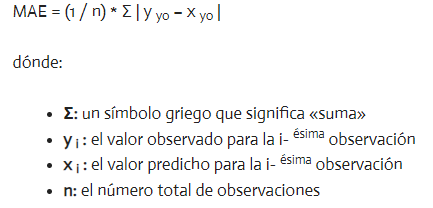

In [48]:
display.display(Image.open("C:/Users/fedel/Downloads/MAE.png"))

#### 6. MAPE:

El error porcentual absoluto medio (MAPE) es una medida estadística para definir la precisión ("accuracy") de un algoritmo de machine learning en un set de datos particular. Cuanto menor sea el valor de MAPE, mejor podrá predecir los valores un modelo. 

Se calcula como:

<center><a><img src="https://www.askpython.com/wp-content/uploads/2020/10/MAPE-1.jpg.webp" border="3" width=200 height=50 class="right"></a>

Donde:
- A: Valor Actual
- F: Valor Predecido (Forecaste value)
- n: tamaño de la muestra



#### 7. RMSLE:

Es RMSE calculado en escala logarítmica. RMSLE es más sensible a los errores relativos que a los absolutos y tiene más en cuenta a los rendimientos por debajo que por encima de lo esperado. RMSLE penaliza una estimación poco predicha mayor que una estimación sobre pronosticada.

<center><a><img src="https://cdn-images-1.medium.com/v2/resize:fit:800/1*VjNfaSRuj3FIMcKA0yJAGg.png" border="3" width=400 height=200 class="right"></a>

## Random Forest Regressor

Un modelo Random Forest está compuesto por un conjunto (ensemble) de árboles de decisión individuales. Cada uno de estos árboles es entrenado con una muestra aleatoria extraída de los datos de entrenamiento originales mediante bootstrapping. Esto implica que cada árbol se entrena con un conjunto de datos ligeramente diferente. En cada árbol individual, las observaciones se distribuyen a través de bifurcaciones (nodos), dando forma a la estructura del árbol hasta llegar a un nodo terminal. La predicción de una nueva observación se obtiene al agregar las predicciones de todos los árboles individuales que conforman el modelo.

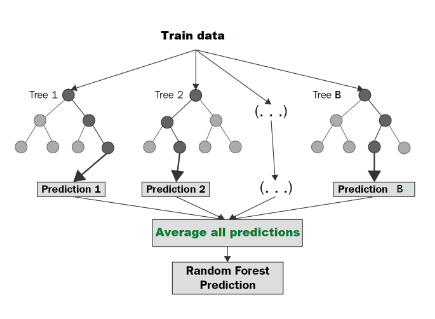

In [49]:
display.display(Image.open("C:/Users/fedel/Downloads/Random Forest para Regresión.png"))

Los algoritmos de Random Forest tienen tres hiperparámetros principales, que deben configurarse antes del entrenamiento:

- Tamaño del nodo
- Cantidad de árboles
- Cantidad de características muestreadas

Podríamos mejorar el rendimiento del modelo realizando un ajuste de hiperparámetros pero como el rendimiento es bueno, decidimos no hacerlo.

Entrenamos los datos con el modelo Random Forest Regressor, guardamos las predicciones y comparamos el resultado:

In [50]:
modelrfr.fit(x_train, y_train)
y_pred = modelrfr.predict(x_test)

In [51]:
out = pd.DataFrame({'Price_actual':y_test, 'Price_pred':y_pred})
result = df_bk.merge(out, left_index=True, right_index=True)

In [52]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
121906,Indigo,6E-224,Kolkata,Night,zero,Night,Delhi,Economy,2.50,17,3999,3999,4284.645
11193,Air_India,AI-544,Delhi,Evening,one,Afternoon,Bangalore,Economy,21.67,8,9840,9840,10407.310
251355,Vistara,UK-818,Bangalore,Evening,one,Morning,Mumbai,Business,14.08,32,69244,69244,70384.160
87172,Air_India,AI-507,Bangalore,Early_Morning,one,Evening,Delhi,Economy,9.75,17,9443,9443,7138.130
70568,Vistara,UK-910,Mumbai,Evening,one,Morning,Hyderabad,Economy,16.08,3,11664,11664,10972.940
53384,Air_India,AI-687,Mumbai,Afternoon,one,Late_Night,Bangalore,Economy,8.17,5,9201,9201,9210.950
113977,Vistara,UK-818,Bangalore,Evening,one,Morning,Hyderabad,Economy,14.00,37,6133,6133,6110.620
163891,Air_India,AI-541,Hyderabad,Evening,one,Afternoon,Mumbai,Economy,20.58,38,4783,4783,4639.820
37028,Indigo,6E-6205,Delhi,Afternoon,one,Night,Chennai,Economy,7.17,14,7950,7950,7969.370
83901,Air_India,AI-442,Mumbai,Afternoon,one,Afternoon,Chennai,Economy,21.25,48,4417,4417,4469.620


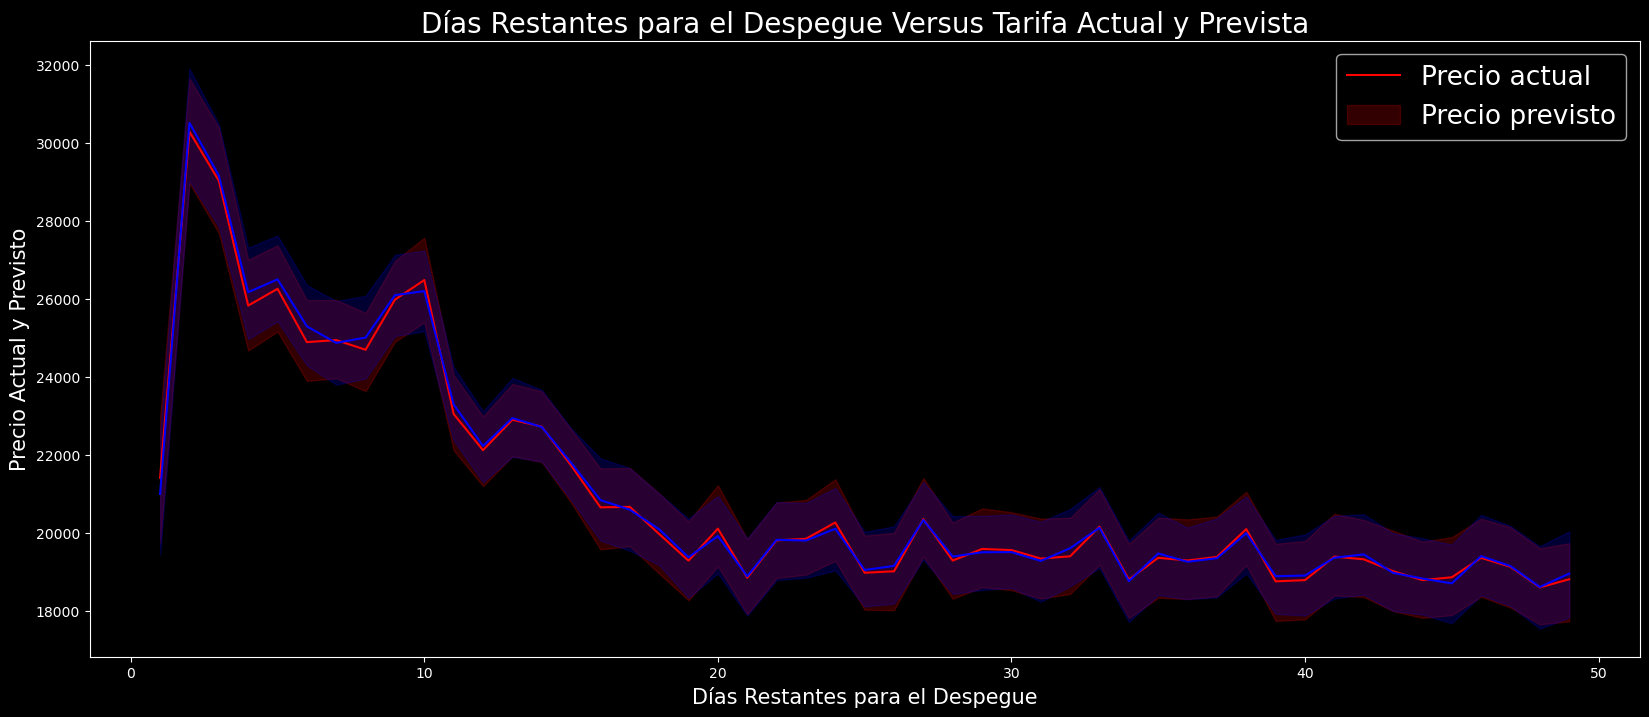

In [53]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Días Restantes para el Despegue Versus Tarifa Actual y Prevista',fontsize=20)
plt.legend(labels=['Precio actual','Precio previsto'],fontsize=19)
plt.xlabel('Días Restantes para el Despegue',fontsize=15)
plt.ylabel('Precio Actual y Previsto',fontsize=15)
plt.show()

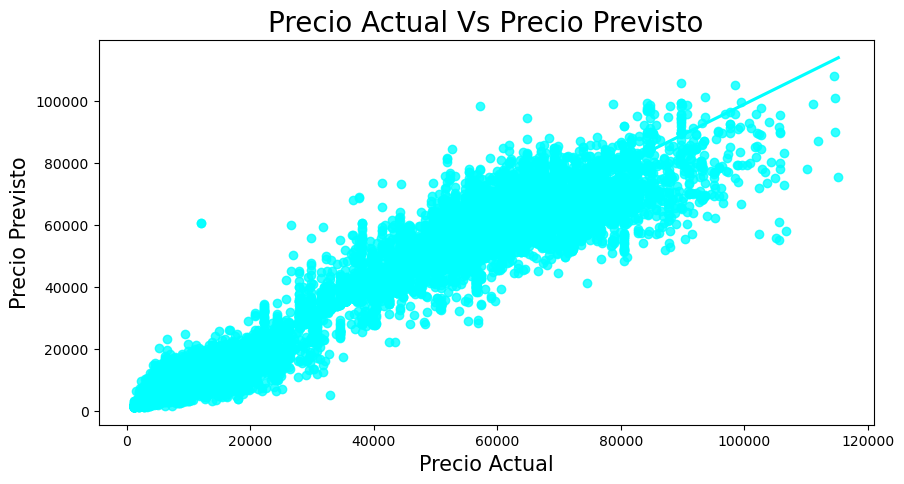

In [54]:
plt.style.use('default')

plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title('Precio Actual Vs Precio Previsto',fontsize=20)
plt.xlabel('Precio Actual',fontsize=15)
plt.ylabel('Precio Previsto',fontsize=15)
plt.show()

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 150%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
    <h2>
    Conclusiones
    
<a class="anchor" id="5"></a> 

1. La brecha entre el precio de asientos "Business" y "Economy" es grande. Si bien existen tarifas "Economy" atípicas iguales o más caras que la clase "Business", la mediana de la clase Business es aproximadamente 5 veces superior que la clase Economy. <br><br>
2. Las únicas dos empresas que ofrecen asientos "Business" son Vistara y Air_India. Vistara tiene precios más caros que Air_India para la clase Business y similares para la clase "Economy". Air_India y Vistara brindan servicios "Economy" a un precio más elevado que el resto de las compañias. Los diferentes análisis realizados tienden a mostrar que AirAsia se trata de una empresa low cost. <br><br>

3. Salir a la tarde o tarde por la noche suele ser más económico. El precio del pasaje es similar para vuelos con horario de salida temprano en la mañana, mañana o tarde. Salir por la noche puede ser más caro en general. En cuanto al momento de llegada, lo más conveniente es llegar temprano por la mañana o tarde por la noche ya que suele ser más económico. Llegar a la noche o por la mañana cuesta casi lo mismo, pero llegar por la tarde podría ser más costoso. <br><br>

4. A mayor cantidad de escalas realizadas, mayor es el precio de cada pasaje y mayor es la diferencia de precios entre una compañia y otra. <br><br>

5. A mayor duración del vuelo, el precio se incrementa para ambas clases. <br><br>

6. Se puede ver un patrón en la forma en que evolucionan los precios según la cantidad de días restantes para la salida del vuelo. Para la clase Economy, cuando quedan más de 20 días el precio es más estable. Cuando faltan menos de 20 días, los precios se incrementan drásticamente, llegando a su tope cuando faltan 2 días para el despegue. Para la clase Business también existe un patrón similar, que se incrementan cuando faltan 10 días o menos. <br><br>

7. De los modelos de Machine Learning que probamos, elegimos Random Forest Regressor con un puntaje R2 de 0.984583 y un R2 ajustado de 0.984582, mejor que el resto de los modelos.

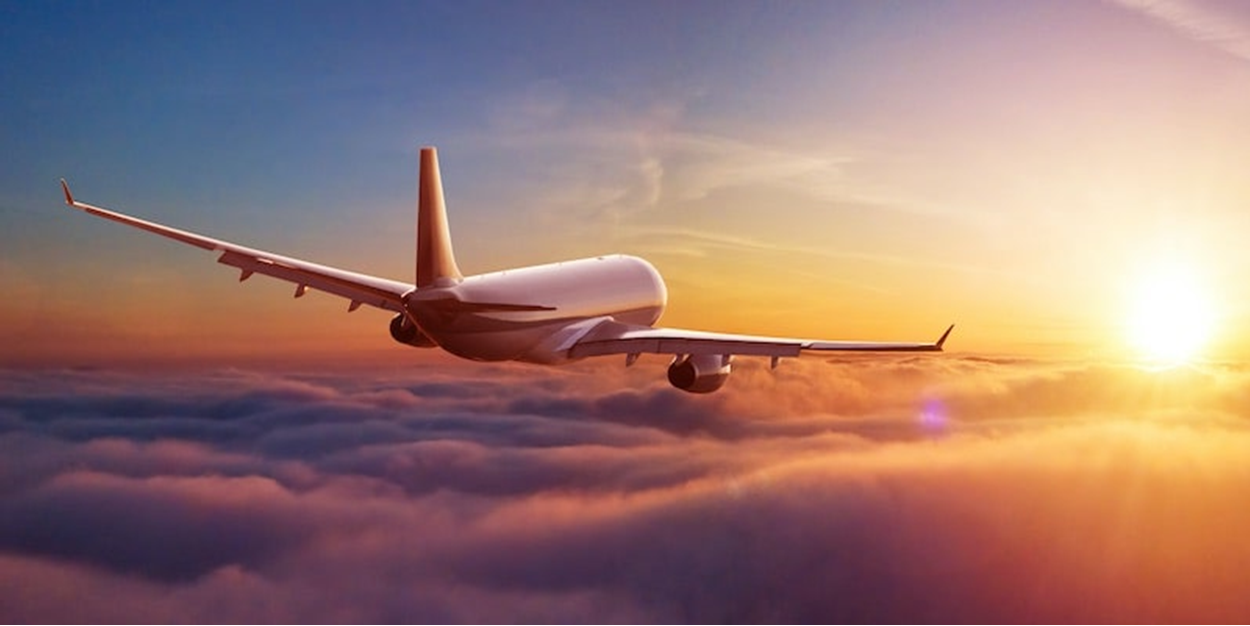

In [55]:
display.display(Image.open("C:/Users/fedel/Downloads/avion2.png"))